# Team Assignment #4 - Data Exploration

Analysis completed by **Team Trackstars (Stuart Bladon and Jason Mooberry).**

# Assignment Instructions (Remove before submission) 

### In your Jupyter notebook report, complete the following:
* Document data context and data sampling in markdown
* Explore and interpret data structure, descriptive statistics, data quality, and variable relationships
* Explore data visually with appropriate visualizations
* Discuss and implement strategies for Handling Missing Values, Removing Duplicates, and Handling Outliers
* Perform data transformation as appropriate
* Create at least one new feature and document your approach
* Perform a dimensionality reduction method on the data and discuss 
* Include a discussion around data quality assessment, including data profiling, data completeness, data accuracy, data consistency, data integrity, and data lineage and provenance

## Submission
To submit your code, make a PR into the data-eda-ta4 branch and add me and the TA as reviewers. Make sure the name of your notebook follows best practices and includes your team name.
## Rubric

### Report (35 points)
* Report includes a title, authors, dates, and relevant information for running it at the top 
* Report includes a reference to the original dataset
* Data context and sampling is documented in markdown
* Code and documented interpretation of data structure
* Code and documented interpretation of descriptive statistics
* Code and documented interpretation of data quality
* Code and documented interpretation of variable relationships
* Visualizations used are complete and appropriate and interpretation(s) are documented in the notebook
* Visualizations follow best practices (titles, axes labels, etc)
* Strategies for handling missing values, outliers, and removing duplicates are implemented and/or discussed
* Appropriate data transformation is performed
* One new feature is engineered and documented
* A dimensionality reduction method is performed and interpreted
* A discussion on data quality assessment is included and incorporates the following components: data profiling, data completeness, data accuracy, data consistency, data integrity, and data lineage and provenance

### Code (10 points)
* Code is in a clearly named notebook
* Code is clean and well organized
* Code is documented with docstrings and comments 
* Branching and PRs were done appropriately
* Requirements are included in the text of the PR and are correct and versioned
* The code runs as documented


In [10]:
import pandas as pd 
import matplotlib as mpl 
import seaborn as sns

# Load Dataset

Clone the [Welltory heart rate variability (HRV) COVID-19 data](https://github.com/Welltory/hrv-covid19/tree/master) into a local repository, iterate over the files and load them into respective dataframes. 

In [11]:
import os

In [12]:
!git clone https://github.com/Welltory/hrv-covid19.git

fatal: destination path 'hrv-covid19' already exists and is not an empty directory.


In [140]:
!ls hrv-covid19/

CONSENT      LICENSE      README.md    data         datatypes.md


In [13]:
!ls hrv-covid19/data

blood_pressure.csv     participants.csv       surveys.csv
heart_rate.csv         scales_description.csv wearables.csv
hrv_measurements.csv   sleep.csv              weather.csv


In [14]:
hrv_data_dir = "hrv-covid19/data" 

dataset = []
files = os.listdir(path=hrv_data_dir)
for file in files: 
    dataset.append({ "name": file.split('.')[0],  "file": file, "path": hrv_data_dir + '/' + file })

In [20]:
dfs = {}
for d in dataset: 
    print(f"Loading {d['name']} ({d['file']}) into [{d['name']}] dataframe ") 
    dfs[d['name']] = pd.read_csv(d['path'])

Loading scales_description (scales_description.csv) into [scales_description] dataframe 
Loading participants (participants.csv) into [participants] dataframe 
Loading wearables (wearables.csv) into [wearables] dataframe 
Loading blood_pressure (blood_pressure.csv) into [blood_pressure] dataframe 
Loading surveys (surveys.csv) into [surveys] dataframe 
Loading heart_rate (heart_rate.csv) into [heart_rate] dataframe 
Loading weather (weather.csv) into [weather] dataframe 
Loading hrv_measurements (hrv_measurements.csv) into [hrv_measurements] dataframe 
Loading sleep (sleep.csv) into [sleep] dataframe 


❗️**Insights**: 

- The included `datatypes.md` file is probably going to contain some helpful information, don't forget to inspect it

# Dataset Structure and Semantics

Here we should: 
* Document data context and data sampling in markdown
* Explore and interpret data structure, descriptive statistics, data quality, and variable relationships
* Explore data visually with appropriate visualizations

## Overall Structure and Composition

See what the included datatypes file has to say about the dataset... 

In [144]:
!cat hrv-covid19/datatypes.md

**Technical description of provided csv files**

**data/participants.csv**

Contains general information about users (participants)

|     |            |                            |           |
|-----|------------|----------------------------|-----------|
|     | **Column** | **Description**            | **Units** |
| 0   | user\_code | Unique user ID             |           |
| 1   | gender     | Gender: m/f/other or empty |           |
| 2   | age\_range | Age range                  |           |
| 3   | city       | City                       |           |
| 4   | country    | Country                    |           |
| 5   | height     | Height                     | cm        |
| 6   | weight     | Weight                     | kg        |
| 7   | symptoms_onset | The onset date of the symptoms of the disease. The format is MM/DD/YYYY. |    |

**data/hrv_measurements.csv**

Contains data based on heart rate variability (HRV) measurements collected from COVID-19 participants via the 

This is essential understanding the dataset, but we can't rely exclusively on the documentation, as the metadata could be outdated or inaccurate. 

Dump the schema of each table to gain an appreciation for their actual features and overall structure. 

Note the explicit calls to the notebook `display` functionality required since the notebook can't infer it's use in a loop. [Source](https://stackoverflow.com/questions/26873127/show-dataframe-as-table-in-ipython-notebook)

In [42]:
from IPython.display import display

In [53]:
for name, df in dfs.items():
    print(name) 
    display(df.head(1))

scales_description


,Scale,Description,Value,Meaning
0,S_COVID_SYMPTOMS,How long the user has been experiencing symptoms,1,Less than 3 days


participants


,user_code,gender,age_range,city,country,height,weight,symptoms_onset
0,007b8190cf,m,25-34,Mandalay,Myanmar,170.18,96.162,NaN


wearables


,user_code,day,resting_pulse,pulse_average,pulse_min,pulse_max,average_spo2_value,body_temperature_avg,stand_hours_total,steps_count,distance,steps_speed,total_number_of_flights_climbed,active_calories_burned,basal_calories_burned,total_calories_burned,average_headphone_exposure,average_environment_exposure
0,007b8190cf,2020-04-26,NaN,70.0,70.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2859.0,2859.0,NaN,NaN


blood_pressure


,user_code,measurement_datetime,diastolic,systolic,functional_changes_index,circulatory_efficiency,kerdo_vegetation_index,robinson_index
0,01bad5a519,2020-04-29 22:33:33,100,150,NaN,NaN,NaN,NaN


surveys


,user_code,scale,created_at,value,text
0,01bad5a519,S_CORONA,2020-04-23,2,Symptoms are characteristic of coronavirus


heart_rate


,user_code,datetime,heart_rate,is_resting
0,007b8190cf,2020-04-26 04:49:25,70,0


weather


,user_code,day,avg_temperature_C,atmospheric_pressure,precip_intensity,humidity,clouds
0,013f6d3e5b,2020-05-22,18.0667,1017.6,0.0002,70.0,67.0


hrv_measurements


,user_code,rr_code,measurement_datetime,time_of_day,bpm,meanrr,mxdmn,sdnn,rmssd,pnn50,...,lf,hf,vlf,lfhf,total_power,how_feel,how_mood,how_sleep,tags,rr_data
0,007b8190cf,10489a6aea,2020-04-21 21:23:08,morning,75,795.9,0.12,45.802,54.174,15.15,...,508.0,1076.0,267.0,0.472,1851.0,0,-1,NaN,COVID-19; Workout; Sex; Hobby; Studying; Sleep...,"819,1008,831,847,785,778,866,839,801,793,846,8..."


sleep


,user_code,day,sleep_begin,sleep_end,sleep_duration,sleep_awake_duration,sleep_rem_duration,sleep_light_duration,sleep_deep_duration,pulse_min,pulse_max,pulse_average
0,0d297d2410,2019-12-31,2019-12-31 07:50:32,2019-12-31 08:45:22,3290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Scales

Investigate the scales table. 

In [67]:
df = dfs['scales_description']

In [68]:
df.dtypes

Scale          object
Description    object
Value           int64
Meaning        object
dtype: object

In [70]:
df['Scale'].unique()

array(['S_COVID_SYMPTOMS', 'S_COVID_COUGH', 'S_COVID_FEVER',
       'S_COVID_BREATH', 'S_COVID_FATIGUE', 'S_COVID_PAIN',
       'S_COVID_CONFUSION', 'S_COVID_TROUBLE', 'S_COVID_BLUISH',
       'S_COVID_OVERALL', 'S_CORONA', 'S_HEART', 'S_HEART_1', 'S_HEART_2',
       'S_HEART_22', 'S_HEART_3', 'S_HEART_4', 'S_HEART_5', 'S_HEART_6',
       'S_HEART_7', 'S_HRA_MONTH\n\xa0', 'S_HRA_ASTHMA', 'S_HRA_ALLERG',
       'S_HRA_LUNG', 'S_HRA_KIDNEY', 'S_HRA_LIVER', 'S_HRA_CHOL',
       'S_HRA_DBT', 'S_HRA_ARR', 'S_HRA_HEART', 'S_HRA_AFTER',
       'S_HRA_HBP', 'S_HRA_LBP', 'S_HRA_THYR', 'S_HRA_EPILEPSY',
       'S_HRA_BONE', 'S_HRA_JOINTS', 'S_HRA_OSTEO', 'S_HRA_NECK',
       'S_HRA_JOINT', 'S_HRA_FIBRO', 'S_HRA_HEAD', 'S_HRA_SLEEP',
       'S_HRA_DEP', 'S_HRA_ANX', 'S_HRA_PANIC', 'S_HRA_EDEMA',
       'S_HRA_CUSHING', 'S_HRA_D', 'S_HRA_OVARY', 'S_HRA_VARI',
       'S_HRA_ENDO', 'S_HRA_HORM', 'S_SMOKING', 'S_HRA_PMS',
       'S_HRA_HEAVY', 'S_HRA_IRR', 'S_HRA_PERPAIN', 'S_HRA_SUGAR',
       'S_HR

In [81]:
def get_subcat1(s): 
    t = s.split('_')
    return t[1] if len(t) >= 2 else None

def get_subcat2(s): 
    t = s.split('_')
    return t[2] if len(t) >= 3 else None
    
df['Subcat1'] = df['Scale'].apply(get_subcat1) 
df['Subcat2'] = df['Scale'].apply(get_subcat2) 

In [87]:
df['Subcat1'].unique()

array(['COVID', 'CORONA', 'HEART', 'HRA', 'SMOKING', 'DIABETES', 'DIAB'],
      dtype=object)

In [88]:
df.head()

,Scale,Description,Value,Meaning,Subcat1,Subcat2
0,S_COVID_SYMPTOMS,How long the user has been experiencing symptoms,1,Less than 3 days,COVID,SYMPTOMS
1,S_COVID_SYMPTOMS,How long the user has been experiencing symptoms,2,3 to 6 days,COVID,SYMPTOMS
2,S_COVID_SYMPTOMS,How long the user has been experiencing symptoms,3,7 to 14 days,COVID,SYMPTOMS
3,S_COVID_SYMPTOMS,How long the user has been experiencing symptoms,4,More than 14 days,COVID,SYMPTOMS
4,S_COVID_COUGH,Symptom intensity: Coughing,1,User isn’t experiencing symptom,COVID,COUGH


In [104]:
df[df['Subcat1'] == 'DIAB' ]

,Scale,Description,Value,Meaning,Subcat1,Subcat2
142,S_DIAB_REASON1,Whether the user’s waist circumference is with...,1,Waist circumference is within the norm,DIAB,REASON1
143,S_DIAB_REASON2,Whether the user is active enough,1,Is active enough,DIAB,REASON2
144,S_DIAB_REASON3,Whether the user eats healthy,1,Eats healthy,DIAB,REASON3
145,S_DIAB_REASON4,Whether the user has BP problems,1,No BP problems,DIAB,REASON4
146,S_DIAB_REASON5,Whether the user’s blood sugar is within the n...,1,Blood sugar is within the norm when taking the...,DIAB,REASON5
147,S_DIAB_REASON6,Whether the user has a family history of diabetes,1,No family history of diabetes,DIAB,REASON6


❗️**Insights**: 

- The scales table appears to be an aggregation of all the enumerative or categorical types found across the dataset.
- This table allows mapping between the categoricals and their plain-language description, the associated integer value and a concise meaning string.
- There is a shallow hierarchy in these types, which we've broken out here into subcategory 1 and subcategory 2.
- The top-level division of the data classifications are: 'COVID', 'CORONA', 'HEART', 'HRA', 'SMOKING', 'DIABETES', 'DIAB'.
- Many of the measurement scales are boolean values, though some have a range of severity.
- The `DIAB` sub-category appears redundant but on closer inspection contains supplemental information on patients with diabetes
- Further analysis on this table is of limited value, as it just contains mappings to decode other readings in the dataset

### Participants

Investigate the study participants table. 

In [464]:
df = dfs['participants']

In [467]:
def table_overview(df): 
    """
    Utility function to produce some high-level insights into the provided dataframe
    """
    rows = len(df)
    print(f"First 5 rows of the dataframe:")
    display(df.head(5))
    print(f"Numerical column statistics:")
    display(df.describe())
    nan_rows = rows - len(df.dropna())
    print(f"Found {rows} rows, of which {nan_rows} ({nan_rows/rows*100:.1f}%) contain invalid data.")

In [468]:
table_overview(df)

First 5 rows of the dataframe:


,user_code,gender,age_range,city,country,height,weight,symptoms_onset
0,007b8190cf,m,25-34,Mandalay,Myanmar,170.18,96.162,NaT
1,013f6d3e5b,f,18-24,São Paulo,Brazil,174.00,77.300,2020-05-15
2,01bad5a519,m,45-54,St Petersburg,Russia,178.00,92.000,2020-04-05
3,0210b20eea,f,25-34,Sochi,Russia,169.00,60.000,2020-05-06
4,024719e7da,f,45-54,St Petersburg,Russia,158.00,68.500,2020-05-27


Numerical column statistics:


,height,weight,symptoms_onset
count,183.000000,185.000000,147
mean,169.976393,77.927757,2017-07-18 04:04:53.877551104
min,132.080000,43.500000,1967-01-30 00:00:00
25%,163.500000,63.500000,2020-03-22 12:00:00
50%,168.000000,74.344000,2020-04-10 00:00:00
75%,174.500000,90.537000,2020-04-29 00:00:00
max,250.000000,154.221000,2022-04-21 00:00:00
std,12.400103,19.552541,NaN


Found 185 rows, of which 49 (26.5%) contain invalid data.


Convert the date to a proper datetime

In [469]:
df['symptoms_onset'] = pd.to_datetime(df['symptoms_onset'])

Look at the symptom onset by time reported

<Axes: >

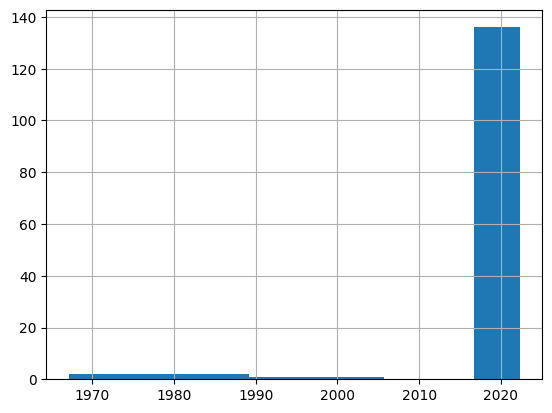

In [470]:
df['symptoms_onset'].hist()

Omit data that occurs outside of the plausible COVID-19 pandemic infection window

In [471]:
import datetime
df = df[df['symptoms_onset'] > datetime.datetime(2019, 1, 1)]

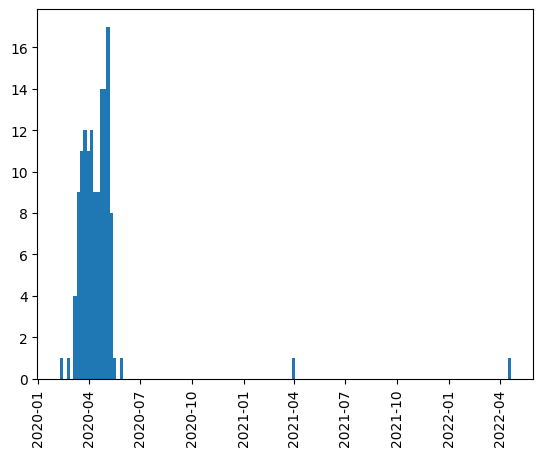

In [472]:
_ = mpl.pyplot.hist(df['symptoms_onset'], bins=len(df), orientation='vertical')
_ = mpl.pyplot.xticks(rotation=90, )

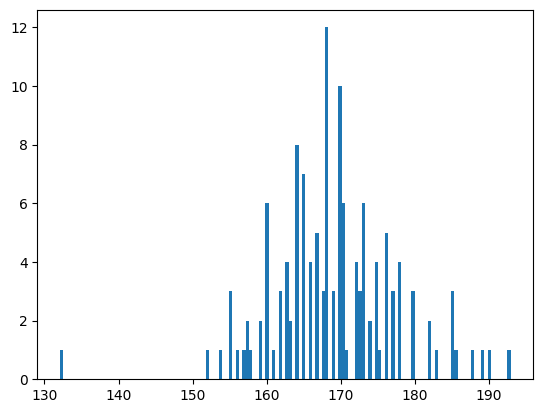

In [473]:
_ = mpl.pyplot.hist(df['height'],bins=len(df))

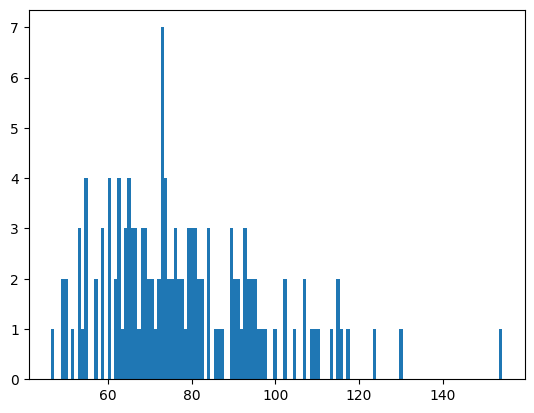

In [474]:
_ = mpl.pyplot.hist(df['weight'], bins=len(df))

Look at the distribution of data grouped by various categoricals, omitting any rows with missing information. 

In [477]:
def box_plot_groups(groups, column): 
    """
    Helper function to take a pandas group iterator (returned from df.groupby) and 
    render an arbitrary number of boxplot subplots, given the column to extract for 
    each boxplot
    """
    fig, ax = mpl.pyplot.subplots()
    
    xlabels = [None] * len(groups)
    position = 0 
    
    for name, group in groups: 

        # Referenced MPL docs here to implement boxplot: https://matplotlib.org/stable/plot_types/stats/boxplot_plot.html#sphx-glr-plot-types-stats-boxplot-plot-py
        ax.boxplot(group[column], positions=[position], tick_labels=[name])    
        
        xlabels[position] = name
        position = position + 1
    
    # With help from https://stackabuse.com/rotate-axis-labels-in-matplotlib/: 
    _ = ax.set_xticklabels(xlabels, rotation=90)

In [480]:
df = df.dropna(subset=['height', 'weight'])

In [489]:
def compute_bmi(h, w): 
    #cm -> m 
    h = h/100 
    return w/h**2

# With cue from https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe
df['bmi'] = df.apply(lambda x: compute_bmi(x.height, x.weight), axis=1) 

In [492]:
country_groups = df.groupby(by='country')

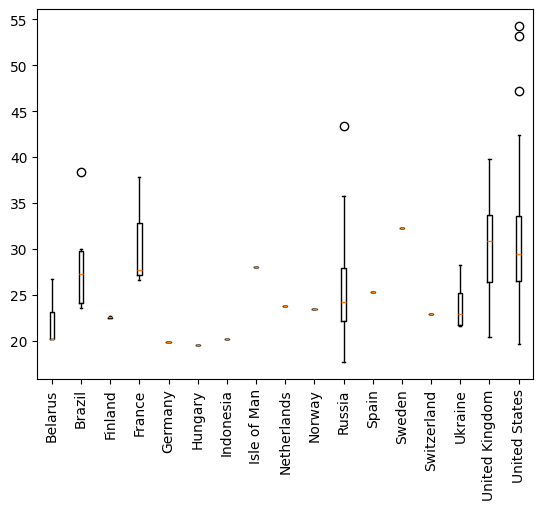

In [493]:
box_plot_groups(country_groups, 'bmi')

❗️**Insights**: 

- There are 185 participants in this study each with their own unique hexadecimal user code
- ~2/3 of the rows in this table are missing data, which introduces a number of questions: 
    - do we treat the asscociated row as an invalid record for all downstream analysis? the interdependence of these tables adds significant complexity here. Illustrative example: a participant with an invalid initial symptom date. If we drop this participant, we need to clean all records for that participant from every table in the dataset. That's not terribly difficult, but is it the right thing to do?
    - do we selectively treat this record as invalid based on the type of informational statistics we're trying to present? running with our example, we could surmise the symptoms reported are all valid (despite the invalid date), and just omit that individual from any analysis that is temporally anchored. 
    - do we interpolate the missing values. Again, with our example we would infer that the participants symptoms would have been reported alongside the vast majority of all others circa Q1/Q2 of 2020 and use e.g. the mean reporting date of other submissions as the date for this participant, annotating the interpolation accordingly
    - do we perhaps create a new category to bin these outliers so the data is still analyzed? In our running example of the bad symptom onset time, we could create a "unknown symptom onset" category that allows use of the datapoints, but with adequate dislaimer
    - Each of the actions enumerated above has consequences that would need to be explained to the party that is ultimately on the receiving end of this analysis (customers, colleagues, future readers of any publications) 
- The numerical data available here is limited to height and weight, reported in centimeters and kilograms respectively
- The time series plot reveals there are erroneous and missing dates for symptom onset, which must be dealth with prior to downstream analysis
- Presumably the data was collected opportunistically, but there are significant biases in the data that do not reflect the global distrbution of location, height, weight, or gender
- The range of reported symptom onset dates is confusing. A few data points exist years beyond the initial global infection event. This could imply less attention was paid to tracking, self reporting, or aggregating the data after mid-2020

### Wearables

In [125]:
df = dfs['wearables']

Note: referenced [this post](https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e) to use a heatmap to improve readability of the correlation matrix below.

<Axes: >

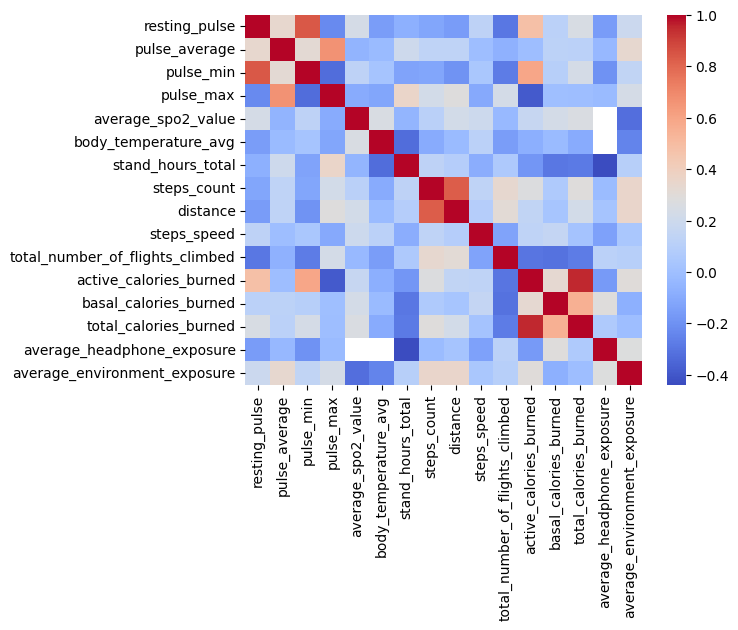

In [132]:
sns.heatmap(df.corr(method='pearson', numeric_only=True), cmap='coolwarm')

❗️**Insights**: 

- Plot a correlation matrix of all the pearson coefficients. 

### Blood Pressure

### Surveys

### Heart Rate

### Weather

### HRV Measurements

### Sleep 

# Dataset Cleaning and Preparation

With a general assessment of the dataset behind us, we can move to clean and prepare the data of interest for deeper analysis. 

Here we should: 
* Discuss and implement strategies for Handling Missing Values, Removing Duplicates, and Handling Outliers
* Perform data transformation as appropriate
* Create at least one new feature and document your approach

# xyz Analyis

Deeper analysis with any necessary visualizations, conclusions, hypothesis testing

We might handle these assignment requirements here: 
* Perform a dimensionality reduction method on the data and discuss 
* Include a discussion around data quality assessment, including data profiling, data completeness, data accuracy, data consistency, data integrity, and data lineage and provenance

Ideas for analysis: 
- Sleep stuff? Stuart
- Summarize all data for each participant (taking e.g. the mean or min or max of time-series data where needed), join the data by participant and get an idea of what the population studied looks like, where are they with respect to a normal distribution of humans?